### Import libraries

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import spreadsheet of all endpoint coordinate labels for all patients' CT scans

x_1, x_2, x_3 in the dataframe below are the x coordinates of endpoint 1, endpoint 2, and endpoint 3 respectively. Same applies for y and z.

In [2]:
# uni pc
#training_labels_file_path = r"C:\Users\thhb20\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\Endpoint locations.xlsx"
#training_labels = pd.read_excel(training_labels_file_path, sheet_name="labelsTr", header=None, names = ["labelsTr", "x_1", "y_1", "z_1", "x_2", "y_2", "z_2", "x_3", "y_3", "z_3"])
#training_labels = pd.DataFrame(training_labels)
#training_labels = training_labels.drop([0,1])
#training_labels = training_labels.set_index("labelsTr")
#training_labels

In [3]:
# personal pc
training_labels_file_path = r"C:\Users\tombe\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\Endpoint locations.xlsx"
training_labels = pd.read_excel(training_labels_file_path, sheet_name="labelsTr", header=None, names = ["labelsTr", "x_1", "y_1", "z_1", "x_2", "y_2", "z_2", "x_3", "y_3", "z_3"])
training_labels = pd.DataFrame(training_labels)
training_labels = training_labels.drop([0,1])
training_labels = training_labels.set_index("labelsTr")
training_labels

,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3
labelsTr,,,,,,,,,
S02,276,195,130,202,264,154,340,314,143
S03,345,205,170,227,264,172,335,314,205
S04,289,205,185,184,272,172,304,294,198
S08,354,193,80,170,263,97,338,351,95
S09,292,263,233,189,319,257,348,356,198
S10,312,198,157,204,280,184,336,309,197
S11,302,131,213,221,215,235,329,233,260
S14,290,221,268,228,301,296,317,327,295
S15,289,246,130,206,327,148,320,366,153


### Display all patient data with their 3 endpoints using spreadsheet of coordinates above (these annotations aren't saved onto the images though, they aren't permanent. Simply plots of a point on top of the image for show) 

<ipython-input-4-ce29d3f4118e>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(12, 6))


<Figure size 432x288 with 0 Axes>

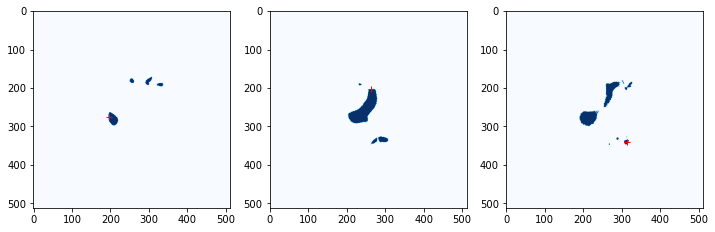

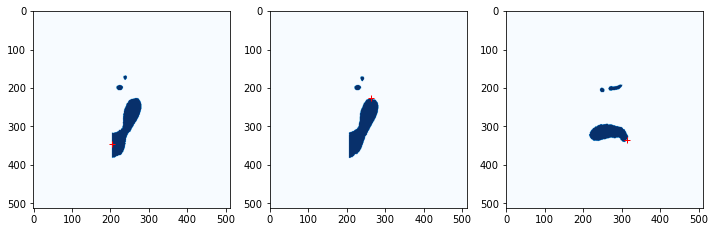

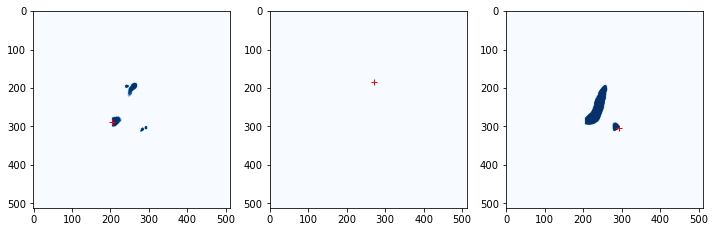

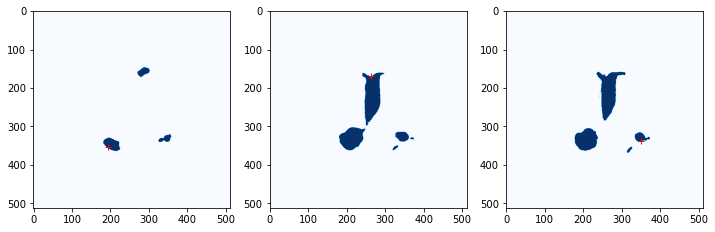

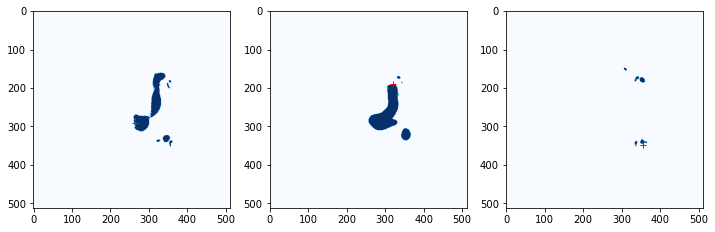

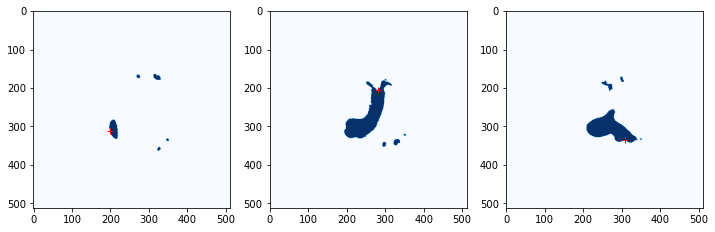

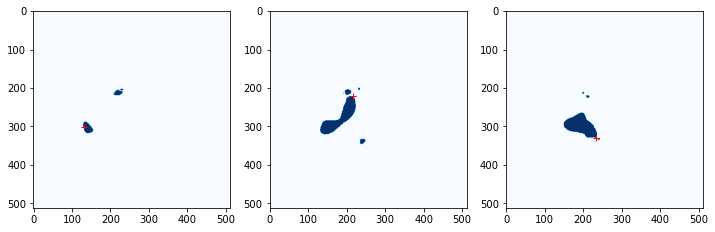

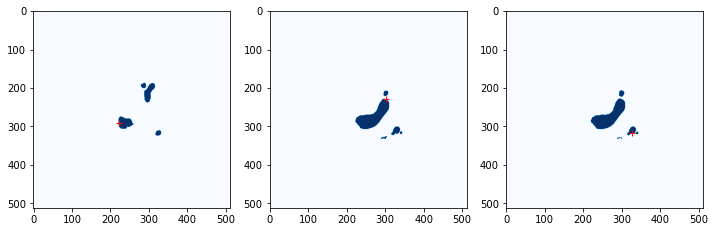

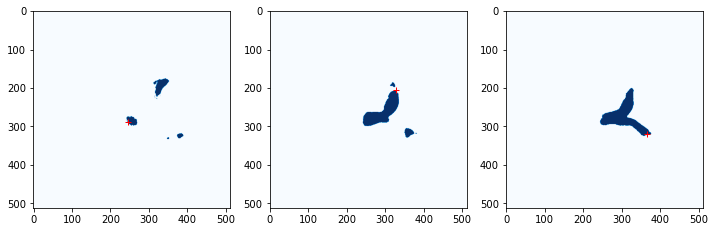

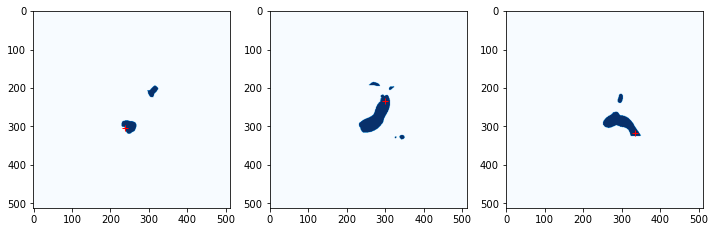

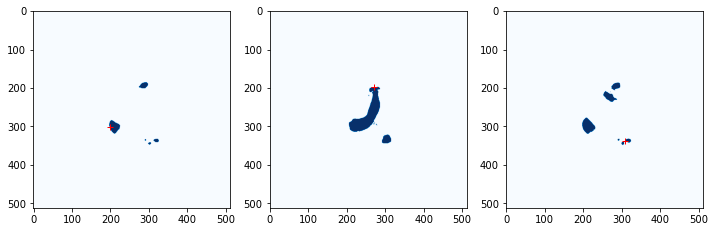

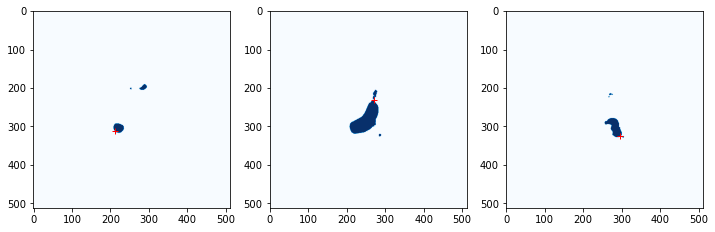

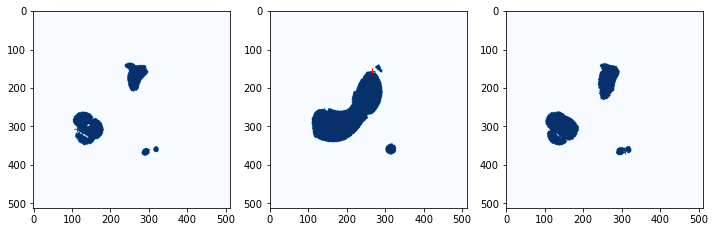

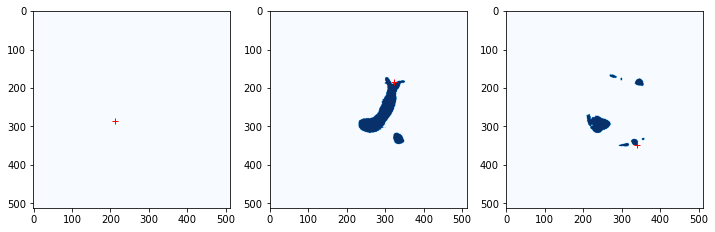

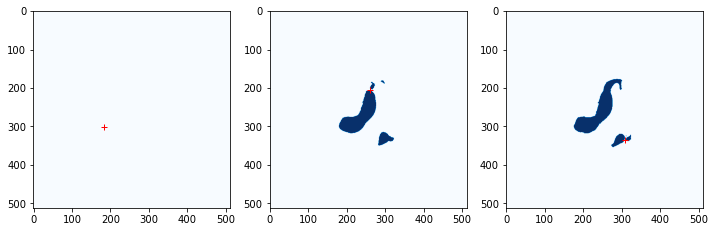

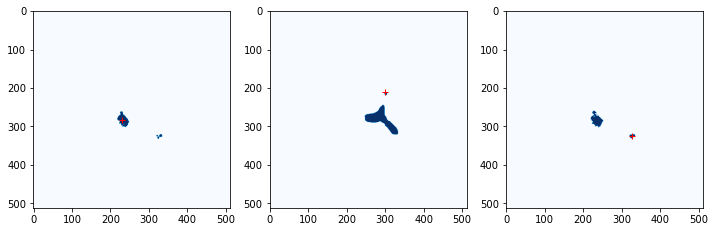

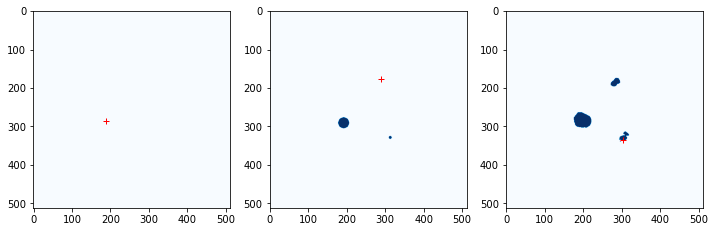

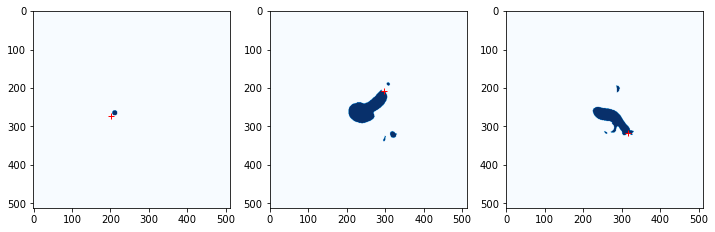

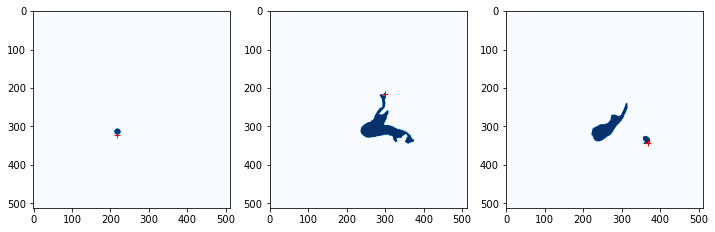

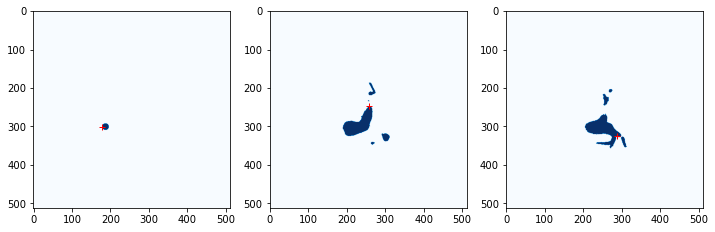

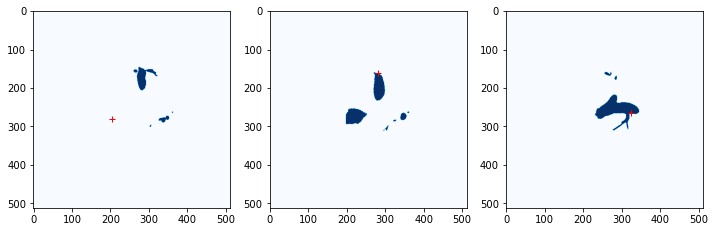

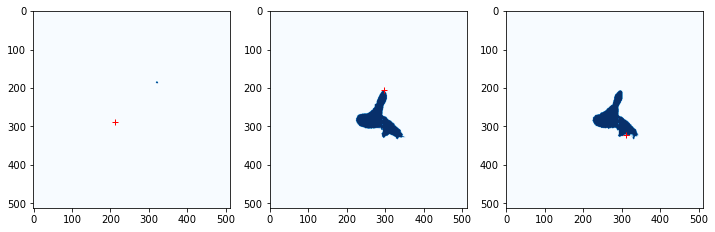

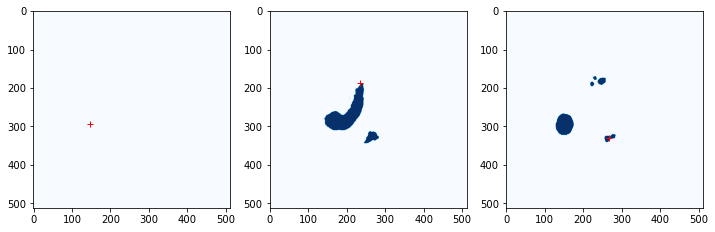

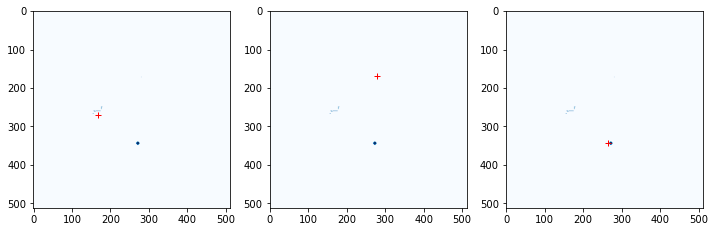

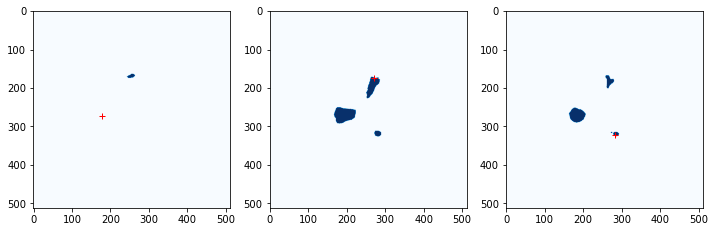

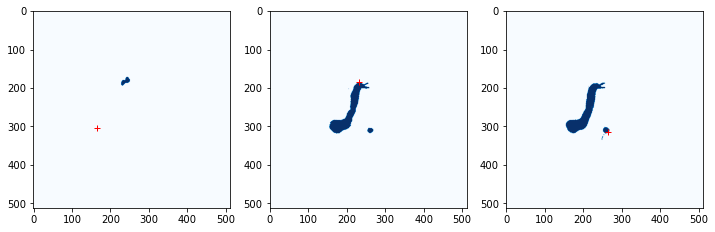

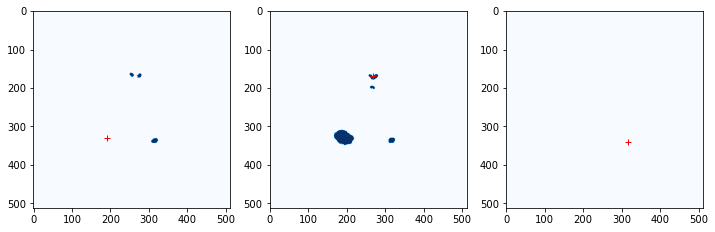

In [4]:
# uni pc
#file_path = r"C:\Users\thhb20\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\labelsTr"

# personal pc
file_path = r"C:\Users\tombe\OneDrive - University of Bath\Documents\YEAR 4\FYP\Semester 2\Data\labelsTr"
os.chdir(file_path)

plt.set_cmap("Blues")

labelsTr = list(training_labels.index.values)

for item in labelsTr: # get rid of "[0:20]" when all data has been labelled and filled into excel sheet
    
    file_name = item + ".nii"
    label = nib.load(file_name)#.get_fdata()
    data_label = label.get_fdata()
    
    # Get the 3 image slices where the 3 endpoints are
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    
    # Endpoint 1 and left plot
    label_data_slice = data_label[:,:,training_labels.loc[item,"z_1"]] # slice at index z
    axes[0].plot(training_labels.loc[item,"y_1"],training_labels.loc[item,"x_1"], 'r+') # endpoint x and y coordinate on given slice
    axes[0].imshow(label_data_slice)

    # Endpoint 2 and center plot
    label_data_slice = data_label[:,:,training_labels.loc[item,"z_2"]] # slice at index z
    axes[1].plot(training_labels.loc[item,"y_2"],training_labels.loc[item,"x_2"], 'r+') # endpoint x and y coordinate on given slice
    axes[1].imshow(label_data_slice)

    # Endpoint 3 and right plot
    label_data_slice = data_label[:,:,training_labels.loc[item,"z_3"]] # slice at index z
    axes[2].plot(training_labels.loc[item,"y_3"],training_labels.loc[item,"x_3"], 'r+') # endpoint x and y coordinate on given slice
    axes[2].imshow(label_data_slice)

### Pre-processing

In [5]:
# normalise depth